# Njabulo Dlamini

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

## Research question/interests

Briefly describe your research question or interests here

Which country had the largest increase in gdp per capita over a specific timeframe?

I believe this is important as we can determine the relationship between a country's economic prosperity and its emissions per capita to determine if a country's economic success is dependent on its dependence on fossil fuels. Although it's probable that there is directly proportional relationship between a country's gdp per capita and its emissions, it would be interesting to see if there are any countries that are able to economically successful while still having relatively low emissions. This could allow for further investigation into what allows these countries to maintain this balance and perhaps lay the foundations that other countries can follow.


## Clean up data set
A problem with the data as is because we contain countries that either no longer exist, are represented by entire regions in a redundant manner or have recently been formed (i.e. South Sudan). Furthermore, the data entries are of type string while also has projections for 2024 up until 2027. For that reason I will now be cleaning the data such that only countries that have numerical values from 1980 to 2023 are in the dataset.


In [ ]:
import pandas as pd
#df = pd.read_csv("../data/raw/gdpPerCap.csv") #gdpPerCap dataframe
df = pd.read_csv("../data/raw/imf-dm-export-20230228.csv", sep = ";", decimal = ',')
df


,"GDP per capita, current prices\n (U.S. dollars per capita)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"582,323","586,204","611,268",no data,no data,no data,no data,no data,no data,no data
2,Albania,"728,359","817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"5257,714","5345,058","5268,239","6373,3","6369,009","6591,682","6968,694","7470,082","7958,016","8469,507"
3,Algeria,"2268,607","2305,505","2254,328","2316,679","2432,717","2753,697","2698,915","2705,111","2143,742",...,"4118,839","3953,576","3304,865","3659,531","4151,437","4162,176","4242,401","4371,569","4523,644","4637,342"
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"42229,903","40688,491","36973,845","41873,06","40722,63","40643,312","41732,561","42833,362","43788,262","44630,354"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,Other advanced economies,"6886,485","6930,571","6792,923","6699,744","6948,341","6861,781","8292,104","10106,092","11787,179",...,"44142,03","43022,85","42555,028","48965,722","49580,11","51398,605","53529,015","55708,932","57993,545","60331,76"
227,Sub-Saharan Africa,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,"1760,388","1727,391","1591,065","1746,345","1849,62","1933,069","2043,649","2160,323","2287,835","2421,53"
228,World,"2862,333","2876,22","2772,215","2797,085","2846,673","2920,23","3376,821","3820,734","4222,994",...,"11489,302","11558,645","11155,514","12616,281","13396,102","13923,716","14522,871","15149,837","15810,007","16490,798"
229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.rename(columns = {"GDP per capita, current prices\n (U.S. dollars per capita)": "Country"}, inplace = True)

mydf = df.drop(['2024', '2025', '2026', '2027'], axis = 1).drop(index = df.index[0]).drop(index = df.index[197:])
mydf = mydf[mydf['1980'].str.contains('no data')== False]
mydf = mydf[mydf['2023'].str.contains('no data') == False]
mydf["1980"]=mydf["1980"].str.replace(',','.')
mydf["2023"]=mydf["2023"].str.replace(',','.')
mydf['Change in gdp per capita'] = mydf['2023'].astype(float) - mydf['1980'].astype(float)
mydf

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change in gdp per capita
2,Albania,728.359,"817,734","824,542","815,529","788,332","788,801","855,724","832,245","805,046",...,"3953,611","4124,405","4525,887","5257,714","5345,058","5268,239","6373,3","6369,009",6591.682,5863.323
3,Algeria,2268.607,"2305,505","2254,328","2316,679","2432,717","2753,697","2698,915","2705,111","2143,742",...,"4153,322","3918,941","4079,653","4118,839","3953,576","3304,865","3659,531","4151,437",4162.176,1893.569
5,Angola,745.119,"679,02","661,52","671,804","693,779","758,525","690,446","769,563","812,794",...,"4354,921","3676,826","4300,097","3465,062","2805,261","1873,11","2352,128","3790,704",3997.713,3252.594
6,Antigua and Barbuda,1920.249,"2177,087","2448,585","2752,968","3200,985","3763,974","4617,61","5455,264","6547,259",...,"14728,706","15588,535","15686,747","16902,149","17495,76","13997,537","14809,483","16786,939",18264.769,16344.520
7,Argentina,8361.209,"6671,428","3257,853","3962,735","4374,783","3248,745","3857,027","3909,984","4524,498",...,"14895,316","12772,868","14618,327","11786,433","10054,023","8571,937","10616,947","13621,859",13767.102,5405.893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Uruguay,4139.894,"4588,983","3727,408","2032,97","1920,896","1865,107","2302,543","2864,701","2946,361",...,"16565,8","16448,817","18431,369","18338,79","17341,404","15208,006","16735,29","20017,557",20463.909,16324.015
190,Vanuatu,1053.849,"956,137","930,89","931,689","1111,403","976,747","918,675","989,126","1092,048",...,"2771,657","2844,132","3158,901","3256,353","3187,38","3294,916","2970,155","3049,75",3114.428,2060.579
191,Venezuela,4671.078,"5085,58","5041,589","4883,234","3447,45","3472,186","3488,564","2619,24","3292,792",...,"4096,879","3676,297","3806,635","3531,883","2675,272","1608,284","2157,322","3051,738",3266.882,-1404.196
192,Vietnam,652.593,"318,521","414,347","612,565","1044,409","318,956","705,99","856,91","464,581",...,"2581,907","2720,168","2957,899","3201,686","3398,214","3514,365","3717,8","4162,938",4682.834,4030.241


Now we have 136 countries that experienced a change in gdp per capita from 1980 up until 2023. However, this is still a great number of to determine which countries have experienced the most economic growth over this period. Thus I have decided to sort the data by the top 15 countries in terms of change in gdp per capita.

In [ ]:
mydf.to_csv("../data/processed/processedGDPData.csv")

In [ ]:
mydf_sort = mydf.sort_values(by="Change in gdp per capita",ascending=False).reset_index(drop = True)
top15 = mydf_sort.drop(index=mydf_sort.index[16:])
top15

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Change in gdp per capita
0,Luxembourg,17666.745,"15190,085","12464,023","12234,668","11984,274","12393,783","17950,002","22149,518","24875,488",...,"106710,076","107948,199","111211,579","118466,355","114357,509","117063,654","136701,396","127672,531",128819.444,111152.699
1,Ireland,6252.207,"5886,368","6078,144","5839,832","5591,81","5934,548","7993,15","9419,506","10365,284",...,"61902,659","62668,052","69685,259","78988,565","80690,152","85225,087","100129,453","102217,439",106997.402,100745.195
2,Singapore,5004.992,"5672,105","6000,032","6717,837","7160,262","6788,387","6870,769","7794,688","9328,951",...,"55645,607","56858,505","61149,62","66857,273","65833,2","60727,616","72794,906","79426,141",84500.411,79495.419
3,Switzerland,19426.638,"17699,844","18027,725","17865,396","17019,366","17187,864","24529,567","30520,621","32794,286",...,"84229,414","82570,749","82576,399","85547,814","84476,471","85870,059","92248,643","92434,492",94834.644,75408.006
4,Norway,15746.262,"15484,681","15196,29","14906,174","14968,787","15728,224","18853,07","22445,038","24143,118",...,"74115,155","70223,817","75306,667","82082,117","75594,048","67265,894","89041,586","92645,973",88748.76,73002.498
5,United States,12552.943,"13948,701","14404,994","15513,679","17086,441","18199,32","19034,766","20000,968","21375,999",...,"56729,681","57839,992","59885,714","62769,664","65051,88","63078,471","69227,11","75179,586",78421.938,65868.995
6,Iceland,15129.182,"15449,046","14003,083","11857,373","12130,436","12506,275","16571,593","22776,756","24820,302",...,"53227,627","62530,419","73085,132","75374,147","69542,649","59578,822","69422,382","73981,336",77960.826,62831.644
7,Qatar,27242.483,"27819,566","22657,373","18003,756","17496,536","15495,701","11644,458","11773,23","10853,896",...,"66346,911","57965,377","59127,513","66421,617","63007,696","53797,937","68621,644","82886,789",89416.443,62173.960
8,Australia,11000.106,"12519,996","12226,554","11584,2","12566,629","10960,218","11237,657","12989,872","16235,068",...,"51412,69","51826,426",55812,"56333,519","54323,089","52952,827","63464,106","66407,604",68023.152,57023.046
9,Denmark,13886.37,"12076,174","11801,273","11852,891","11561,767","12259,279","17215,426","21349,948","22528,114",...,"53478,495","54862,848","57772,553","61724,492","59678,596","61005,841","68202,07","65713,412",66393.635,52507.265


In [ ]:
mydf.to_csv("../data/processed/processedEmissoinsData.csv")

[Text(0.5, 1.0, 'Change in gdp per capita by country from 1980-2023')]

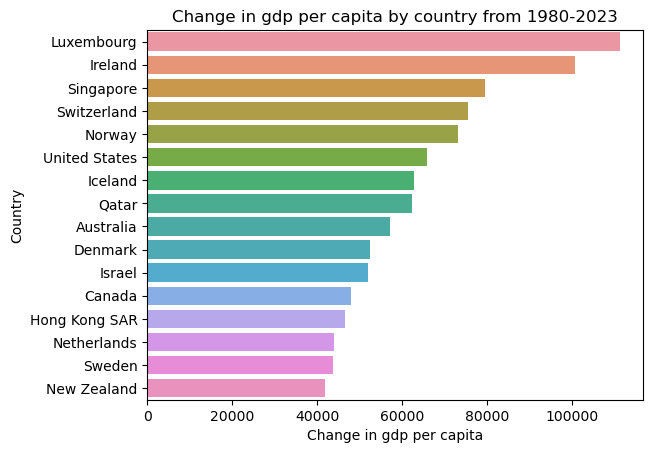

In [ ]:
sns.barplot(x = "Change in gdp per capita", y = "Country", data = top15).set(title="Change in gdp per capita by country from 1980-2023")

Based on the barplot it is apparent that these countries are the top 16 in terms in of economic prosperity.


In [ ]:
top15countries = ["Luxembourg", "Ireland", "Singapore", "Switzerland", "Norway", "New Zealand", "Iceland", "Qatar", "Australia", "Denmark", "Israel", "Canada", "Hong Kong", "Netherlands",  "Sweden", "United States"]
df_em = pd.read_csv("../data/raw/owid_emissions.csv") #Emissions dataframe
mydf = df_em[(df_em['year'] >= 1980)].iloc[:,[0,1,3,4,7,9]].reset_index()
#mydf = df_em.iloc[:,[0,1,3,4,7,9]].reset_index()
mydf16 = mydf[mydf["country"].isin(top15countries)].reset_index()
mydf16['Emissions per capita'] = mydf15['co2']*1000000/mydf['population']
mydf16


,level_0,index,country,year,population,gdp,co2,co2_growth_prct,Emissions per capita
0,735,3503,Australia,1980,14706329.0,3.357565e+11,220.532,7.645,17.661437
1,736,3504,Australia,1981,14930055.0,3.487268e+11,230.133,4.354,20.630117
2,737,3505,Australia,1982,15168446.0,3.483015e+11,233.889,1.632,23.184207
3,738,3506,Australia,1983,15383079.0,3.483536e+11,224.786,-3.892,22.588273
4,739,3507,Australia,1984,15579478.0,3.723796e+11,236.362,5.150,23.073914
...,...,...,...,...,...,...,...,...,...
667,10337,44218,United States,2017,329791232.0,1.759628e+13,5210.958,-0.777,NaN
668,10338,44219,United States,2018,332140032.0,1.814065e+13,5376.657,3.180,NaN
669,10339,44220,United States,2019,334319680.0,NaN,5259.144,-2.186,NaN
670,10340,44221,United States,2020,335942016.0,NaN,4715.691,-10.333,NaN


In [ ]:
mydf16.to_csv("../data/processed/processedEmissionsDataNjabulo.csv")

<matplotlib.legend.Legend>

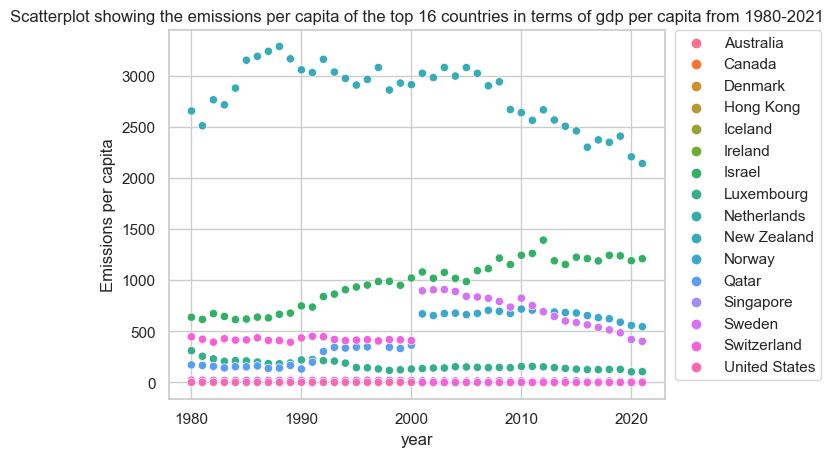

In [ ]:
sns.set_style("whitegrid")
sns.scatterplot( data = mydf16, y = 'Emissions per capita', x = 'year', hue = 'country').set(title = "Scatterplot showing the emissions per capita of the top 16 countries in terms of gdp per capita from 1980-2021")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

# Creating new data frame
The scatter plot fails to give full information so first due to there still being too many countries so I have decided to do some further filtering.

In [ ]:
top_df = mydf16.groupby('country')['co2'].mean()
top_df = pd.DataFrame(top_df)
top_df

,co2
country,
Australia,336.383405
Canada,516.754714
Denmark,51.476548
Hong Kong,34.951905
Iceland,2.759000
Ireland,37.184738
Israel,49.715881
Luxembourg,10.004167
Netherlands,164.022952


<seaborn.axisgrid.FacetGrid>

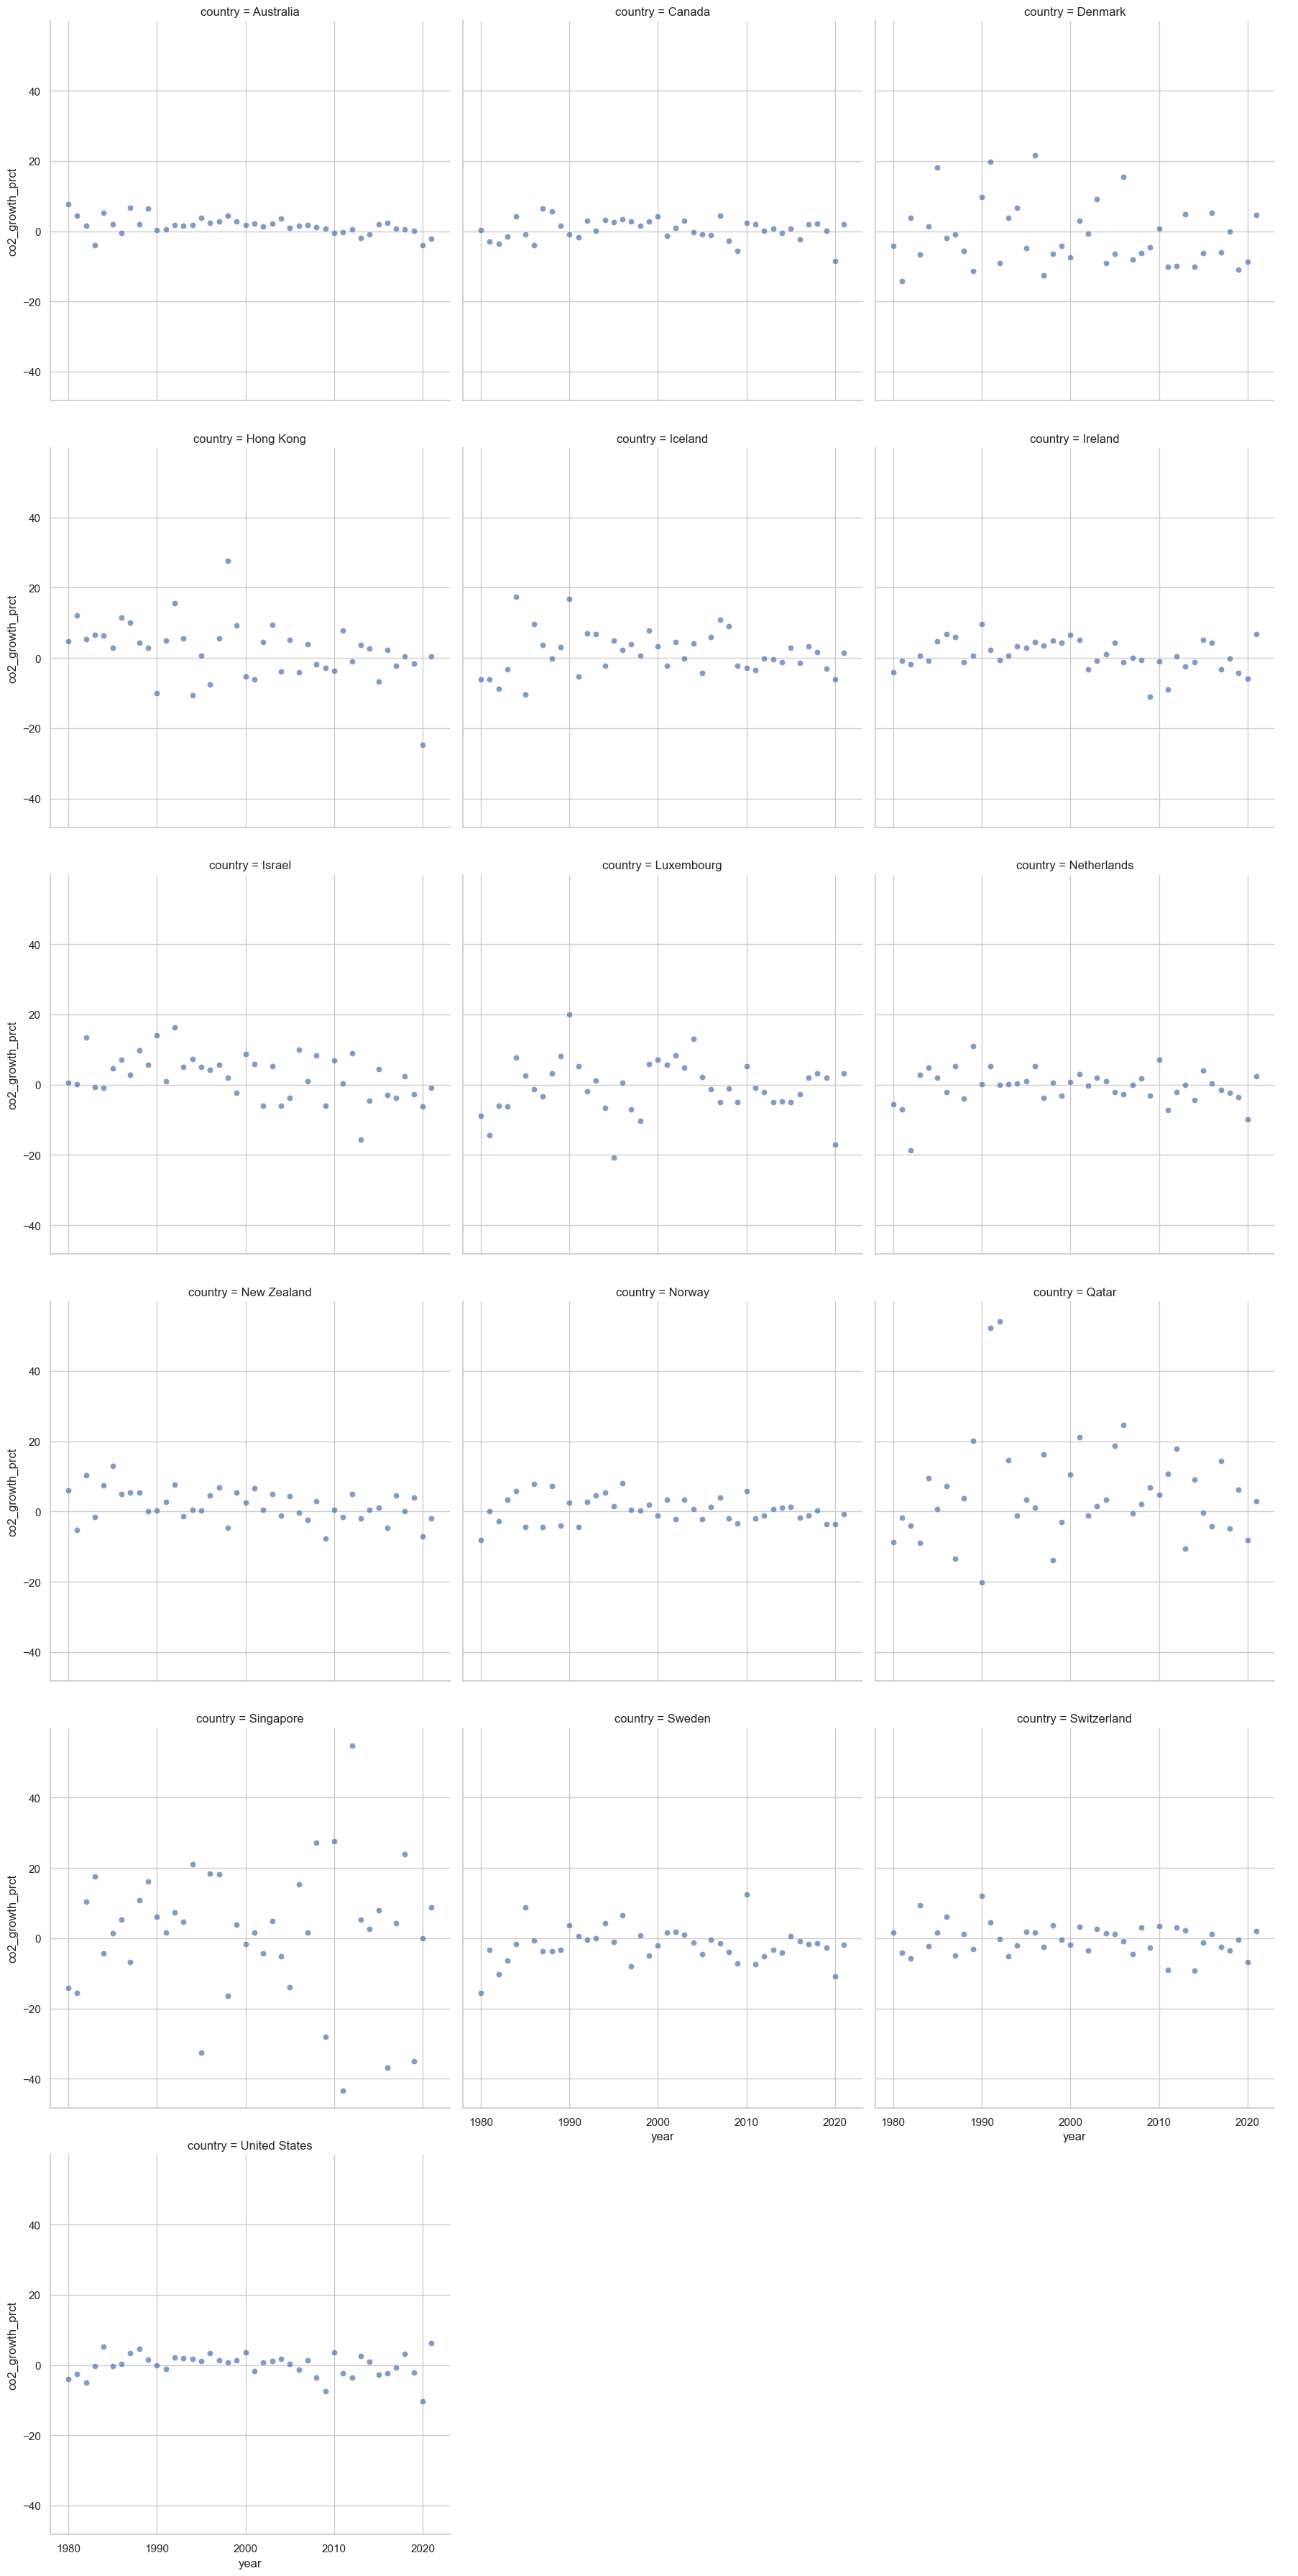

In [ ]:
g = sns.FacetGrid(mydf16, col="country",col_wrap = 3, height = 6, aspect = 1)
g.map(sns.scatterplot, "year", "co2_growth_prct", alpha=.7)
g.add_legend()


As we can see the top 15 countries in terms of gdp per capita have largely tried keeping their emissions growth percentage around zero percent while many have made efforts to shrink their co2 emissions in recent years. However, from this plot we cannot really draw any conclusions as to which countries are able to keep a balance between having an economic prosperity while still being relatively eco-friendly. Furthermore, given the above dataframe it is abundantly clear that the United states has a significantly higher mean CO2 emissions compared to evertone else so I have elected to exclude it from the rest of the analysis.

<AxesSubplot:xlabel='Emissions per capita', ylabel='country'>

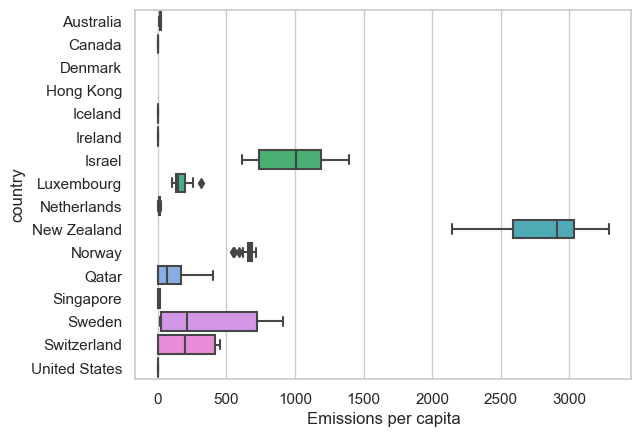

In [ ]:
sns.boxplot(x = 'Emissions per capita', y = 'country', data = mydf16)

As we can see, countries such as Sweden, New Zealand, Israel and Switzerland have significantly large emissions per capita so for we will now be focusing on the rest of the countries to gain a better idea.

In [ ]:
topcountries = ["Ireland",  "Iceland", "Canada"]
mydftop = mydf16[mydf16["country"].isin(topcountries)]

mydftop

,level_0,index,country,year,population,gdp,co2,co2_growth_prct,Emissions per capita
42,1785,7917,Canada,1980,24511512.0,6.341136e+11,442.847,0.265,0.919641
43,1786,7918,Canada,1981,24815780.0,6.537744e+11,429.630,-2.985,0.866791
44,1787,7919,Canada,1982,25101514.0,6.338530e+11,414.455,-3.532,0.811796
45,1788,7920,Canada,1983,25360732.0,6.523177e+11,408.339,-1.476,0.777292
46,1789,7921,Canada,1984,25602080.0,6.897335e+11,425.233,4.137,0.787202
...,...,...,...,...,...,...,...,...,...
247,4766,20893,Ireland,2017,4771860.0,2.905816e+11,39.078,-3.199,0.949958
248,4767,20894,Ireland,2018,4834506.0,3.143217e+11,39.012,-0.168,0.930474
249,4768,20895,Ireland,2019,4896021.0,NaN,37.326,-4.324,0.874035
250,4769,20896,Ireland,2020,4946123.0,NaN,35.153,-5.820,0.809014


[Text(0.5, 1.0, 'Boxplots of the top 3 countries in terms of gdp per capita as well as emissions per capita.')]

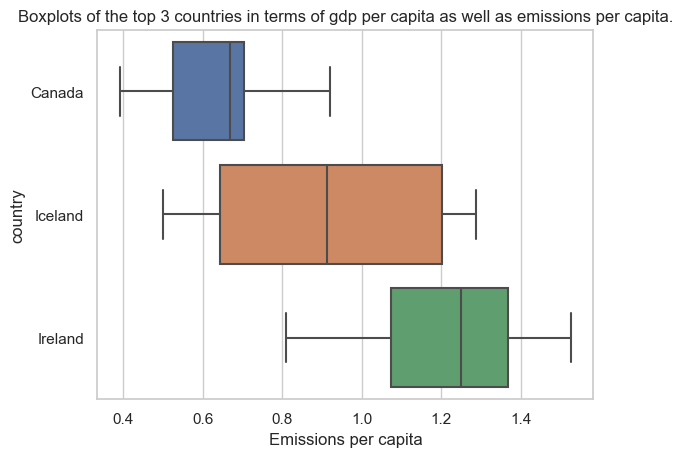

In [ ]:
sns.boxplot(x = "Emissions per capita", y = 'country', data = mydftop).set(title='Boxplots of the top 3 countries in terms of gdp per capita as well as emissions per capita.')

# Initial observations
According to the data these three countries have consistently been among the best when it came to having economic prosperity while having low emissions relative to their population size over the periods of 1980-2021. It would be interesting to see in particular Canada's situation due to their highly industrial economy as to what policies were put in place for it to have such consistently low emissions per capita while being an economic power house in the global economy.